<a href="https://colab.research.google.com/github/izzul112/Submission-Image_Classification/blob/master/Submission_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# melakukan ekstraksi pada file zip
import zipfile, os
local_zip = '/content/gdrive/My Drive/dataset/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp'
train_dir = os.path.join(base_dir, 'train')

In [4]:
os.listdir('/tmp/train')

['NORMAL', 'DME', 'CNV', 'DRUSEN']

In [5]:
# membuat direktori CNV pada direktori data training
train_CNV_dir = os.path.join(train_dir, 'CNV')

# membuat direktori DME pada direktori data training
train_DME_dir = os.path.join(train_dir, 'DME')

# membuat direktori DRUSEN pada direktori data training
train_DRUSEN_dir = os.path.join(train_dir, 'DRUSEN')

# membuat direktori NORMAL pada direktori data training
train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')

# membuat direktori CNV pada direktori data validasi
validation_CNV_dir = os.path.join(train_dir, 'CNV')

# membuat direktori DME pada direktori data validasi
validation_DME_dir = os.path.join(train_dir, 'DME')

# membuat direktori DRUSEN pada direktori data validasi
validation_DRUSEN_dir = os.path.join(train_dir, 'DRUSEN')

# membuat direktori NORMAL pada direktori data validasi
validation_NORMAL_dir = os.path.join(train_dir, 'NORMAL')

In [6]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(200, 300),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas lebih maka menggunakan class_mode = 'categorical'
        class_mode="categorical",
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        train_dir, # direktori data validasi
        target_size=(200, 300), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas lebih maka menggunakan class_mode = 'categorical'
        class_mode='categorical',
        subset='validation'
        )

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


In [8]:
# Callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') and logs.get('val_accuracy')>0.93):
      print("\nReached 93% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [9]:
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(200, 300, 3))),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 300, 3)),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.layers[0].trainable = False

234553344/234545216 [==============================] - 2s 0us/step


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [11]:
history = model.fit(
            train_generator,
            steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
            epochs=50, 
            batch_size=128,
            validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
            validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
            verbose=2, callbacks=[callbacks])

Epoch 1/50
25/25 - 93s - loss: 111.8017 - accuracy: 0.3200 - val_loss: 8.7058 - val_accuracy: 0.4000
Epoch 2/50
25/25 - 95s - loss: 6.5771 - accuracy: 0.5200 - val_loss: 7.4760 - val_accuracy: 0.4500
Epoch 3/50
25/25 - 94s - loss: 5.2458 - accuracy: 0.4400 - val_loss: 2.7952 - val_accuracy: 0.4000
Epoch 4/50
25/25 - 95s - loss: 4.8228 - accuracy: 0.4400 - val_loss: 4.3320 - val_accuracy: 0.7000
Epoch 5/50
25/25 - 97s - loss: 2.8705 - accuracy: 0.6100 - val_loss: 1.5631 - val_accuracy: 0.8500
Epoch 6/50
25/25 - 94s - loss: 3.5765 - accuracy: 0.5000 - val_loss: 3.2620 - val_accuracy: 0.3000
Epoch 7/50
25/25 - 93s - loss: 3.4578 - accuracy: 0.5400 - val_loss: 1.4023 - val_accuracy: 0.6000
Epoch 8/50
25/25 - 94s - loss: 2.2849 - accuracy: 0.5900 - val_loss: 3.1271 - val_accuracy: 0.5500
Epoch 9/50
25/25 - 97s - loss: 3.1077 - accuracy: 0.5800 - val_loss: 3.6738 - val_accuracy: 0.4500
Epoch 10/50
25/25 - 95s - loss: 2.4081 - accuracy: 0.5400 - val_loss: 3.7306 - val_accuracy: 0.5000
Epoch 1

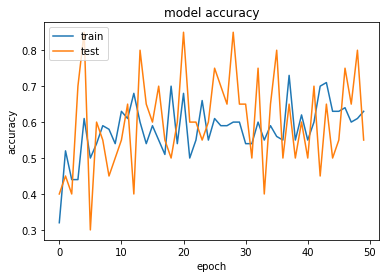

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

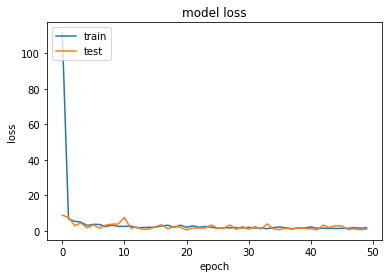

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# # Konversi model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

In [15]:
# with tf.io.gfile.GFile('model.tflite', 'wb') as f:
#   f.write(tflite_model)